In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

sys.path.append('../src')
from simulation.user_sessions import user_weekly_session_dist, user_weekly_sessions, simulate_users
from experiments.pre_test_analysis import required_sample_size, cuped_corr_coef

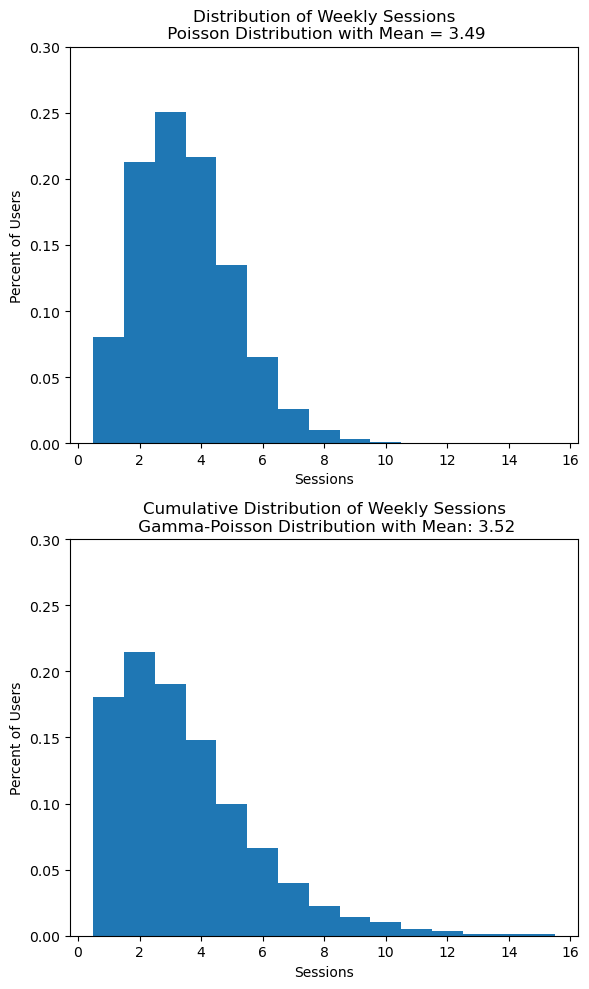

In [2]:
poisson_weekly_user_sessions = []
gamma_poisson_weekly_user_sessions = []

for _ in range(10000):
    lam = user_weekly_session_dist()
    poisson_sessions_capped = min(user_weekly_sessions(2.5), 15)
    poisson_weekly_user_sessions.append(poisson_sessions_capped)
    lam_sessions_capped = min(user_weekly_sessions(lam), 15)
    gamma_poisson_weekly_user_sessions.append(lam_sessions_capped)

poisson_mean = np.mean(poisson_weekly_user_sessions) 
gamma_poisson_mean = np.mean(gamma_poisson_weekly_user_sessions)

fig, axs = plt.subplots(2, 1, figsize=(6,10))

axs[0].hist(poisson_weekly_user_sessions, 
            bins=range(1, 17), 
            align='left', 
            density=True
)
axs[0].set_xlabel('Sessions')
axs[0].set_ylabel('Percent of Users')
axs[0].set_title('Distribution of Weekly Sessions\n Poisson Distribution with Mean = {:.2f}'.format(poisson_mean))
axs[0].set_ylim(0, 0.3)

axs[1].hist(gamma_poisson_weekly_user_sessions, 
            bins=range(1, 17), 
            align='left', 
            density=True
)
axs[1].set_xlabel('Sessions')
axs[1].set_ylabel('Percent of Users')
axs[1].set_title('Cumulative Distribution of Weekly Sessions\n Gamma-Poisson Distribution with Mean: {:.2f}'.format(gamma_poisson_mean))
axs[1].set_ylim(0, 0.3)

plt.tight_layout()
plt.show()

Both distributions produce a sample mean around 3.5. Using the gamma distribution  at $\alpha = 2.5$ and $\theta = 1$ to determine the poisson parameter creates a longer tail at a given mean than using poisson alone at $\lambda = 2.5$. I think the former better models the wider range of user activity such as power users.

In [ ]:
cuped_corr_coef = cuped_corr_coef(100000, 8)
print('Estimated CUPED correlation coefficient: {:.3f}'.format(cuped_corr_coef))

pre_c_users, post_c_users, pre_t_users, post_t_users = simulate_users(100000,8)
pre_exp_users_sum = np.vstack([pre_c_users, pre_t_users]).sum(axis=1)
post_exp_users_sum = np.vstack([post_c_users, post_t_users]).sum(axis=1)

t_test_n, t_test_cuped_n, seq_test_n, seq_test_cuped_n = required_sample_size(pre_exp_users_sum, cuped_corr_coef=cuped_corr_coef, seq_final_alpha=.045)
print(f'T-test required sample size: {t_test_n}')
print(f'T-test with CUPED required sample size: {t_test_cuped_n}')
print(f'Group sequential test required sample size: {seq_test_n}')
print(f'Group sequential test with CUPED required sample size: {seq_test_cuped_n}')

Estimated CUPED correlation coefficient: 0.402
T-test required sample size: 9975
T-test with CUPED required sample size: 8360
Group sequential test required sample size: 10296
Group sequential test with CUPED required sample size: 8629


~.4 correlation coefficient between pre- and post-experiment sessions over a 4 week period seems reasonable. It creates a ~16% decrease in required sample size when using CUPED. Group sequential test is only slightly higher than t-test since I will be using the O'Brien-Flemming method.